<a href="https://colab.research.google.com/github/Rithikkaa-17/Silicon-Replacement-Prediction-using-ML/blob/main/Silicon_Replacement_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymatgen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 19.5 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade pymatgen

In [ ]:
from google.colab import files
files.download("perovskite_solar_cell_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from pymatgen.ext.matproj import MPRester
import pandas as pd

# Replace 'YOUR_API_KEY' with your actual Materials Project API key
API_KEY = "VWObDvCj8q0BG8b9n6sRYJ3tbLjioho6"

# Initialize the MPRester
mpr = MPRester(API_KEY)

# Query for perovskite-like materials (e.g., Cs-Pb-I system)
materials = mpr.summary.search(elements=["Cs", "Pb", "I"], chemsys=["Cs-Pb-I"])

# Print the number of materials retrieved
print(f"Retrieved {len(materials)} materials.")

# Process data into a dataset
data = []
for material in materials:
    data.append({
        "material_id": material.get("material_id"),
        "formula": material.get("formula_pretty"),
        "band_gap": material.get("band_gap"),
        "density": material.get("density"),
        "formation_energy_per_atom": material.get("formation_energy_per_atom"),
        "energy_above_hull": material.get("energy_above_hull"),
    })

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Save to a CSV file
df.to_csv("perovskite_solar_cell_dataset.csv", index=False)
print("Dataset saved as 'perovskite_solar_cell_dataset.csv'")



Retrieved 5 materials.
  material_id  formula  band_gap   density  formation_energy_per_atom  \
0  mp-1069538   CsPbI3    1.4785  4.844004                  -1.238177   
1  mp-1120768   CsPbI3    1.6421  4.746507                  -1.247403   
2   mp-540839   CsPbI3    2.5181  5.143480                  -1.263227   
3  mp-1238789  CsPb2I5    1.9459  5.510956                  -1.097308   
4  mp-1238804  Cs4PbI6    3.4095  4.281369                  -1.528861   

   energy_above_hull  
0           0.025049  
1           0.015823  
2           0.000000  
3           0.037909  
4           0.000000  
Dataset saved as 'perovskite_solar_cell_dataset.csv'


In [ ]:
from pymatgen.ext.matproj import MPRester
import pandas as pd

# Replace 'YOUR_API_KEY' with your actual Materials Project API key
API_KEY = "VWObDvCj8q0BG8b9n6sRYJ3tbLjioho6"

# Initialize the MPRester
mpr = MPRester(API_KEY)

# Query for materials with band gap and stability conditions
materials = mpr.summary.search(
    band_gap_min=1.1,                   # Minimum band gap (eV)
    band_gap_max=1.7,                   # Maximum band gap (eV)
    energy_above_hull_max=0.1           # Maximum energy above hull (eV) for stability
)

# Print the number of materials retrieved
print(f"Retrieved {len(materials)} materials.")

# Exclude materials with unwanted elements (e.g., Pb, Cd, Hg)
excluded_elements = {"Pb", "Cd", "Hg"}
filtered_materials = [
    material for material in materials
    if not excluded_elements.intersection(set(material.get("elements", [])))
]

# Print the number of materials after filtering
print(f"Filtered to {len(filtered_materials)} materials after excluding toxic elements.")

# Process data into a dataset
data = []
for material in filtered_materials:
    data.append({
        "material_id": material.get("material_id"),
        "formula": material.get("formula_pretty"),
        "band_gap": material.get("band_gap"),
        "density": material.get("density"),
        "formation_energy_per_atom": material.get("formation_energy_per_atom"),
        "energy_above_hull": material.get("energy_above_hull"),
    })

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())

# Save to a CSV file
df.to_csv("potential_absorber_materials_filtered.csv", index=False)
print("Dataset saved as 'potential_absorber_materials_filtered.csv'")



Retrieved 8047 materials.
Filtered to 7537 materials after excluding toxic elements.
  material_id       formula  band_gap   density  formation_energy_per_atom  \
0   mp-560328  Ag15P4S16Cl3    1.2888  4.587131                  -0.481548   
1   mp-559071   Ag2Bi2S3Cl2    1.6368  5.894386                  -0.747980   
2   mp-556345      Ag2BrNO3    1.6045  5.030350                  -0.655070   
3   mp-690687      Ag2H2IOF    1.4591  5.044166                  -1.046625   
4   mp-557396       Ag2INO3    1.4835  5.242349                  -0.618246   

   energy_above_hull  
0           0.000000  
1           0.004958  
2           0.019581  
3           0.000000  
4           0.001588  
Dataset saved as 'potential_absorber_materials_filtered.csv'


In [ ]:
from google.colab import files
files.download("potential_absorber_materials_filtered.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("potential_absorber_materials_filtered.csv")

# Display the first few rows
print(df.head())

# Get the number of rows and columns
print(f"The dataset contains {df.shape[0]} materials and {df.shape[1]} columns.")


  material_id       formula  band_gap   density  formation_energy_per_atom  \
0   mp-560328  Ag15P4S16Cl3    1.2888  4.587131                  -0.481548   
1   mp-559071   Ag2Bi2S3Cl2    1.6368  5.894386                  -0.747980   
2   mp-556345      Ag2BrNO3    1.6045  5.030350                  -0.655070   
3   mp-690687      Ag2H2IOF    1.4591  5.044166                  -1.046625   
4   mp-557396       Ag2INO3    1.4835  5.242349                  -0.618246   

   energy_above_hull  
0           0.000000  
1           0.004958  
2           0.019581  
3           0.000000  
4           0.001588  
The dataset contains 7537 materials and 6 columns.


In [ ]:
# Show all rows and columns (for larger datasets, this is optional)
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

# Display the dataset
print(df)


     material_id                  formula  band_gap    density  \
0      mp-560328             Ag15P4S16Cl3    1.2888   4.587131   
1      mp-559071              Ag2Bi2S3Cl2    1.6368   5.894386   
2      mp-556345                 Ag2BrNO3    1.6045   5.030350   
3      mp-690687                 Ag2H2IOF    1.4591   5.044166   
4      mp-557396                  Ag2INO3    1.4835   5.242349   
5     mp-1190325                Ag2P2PdO7    1.1668   4.761193   
6      mp-707138                  Ag2PHO4    1.3274   4.997597   
7      mp-561822                   Ag2PS3    1.4401   4.447850   
8       mp-13956                  Ag2PSe3    1.1866   5.793370   
9     mp-1102900                     Ag2S    1.1840   6.204328   
10    mp-1393712                     Ag2S    1.2299   6.374804   
11    mp-2018369                     Ag2S    1.5694   6.702851   
12      mp-31053                     Ag2S    1.3634   6.093478   
13      mp-32669                     Ag2S    1.3001   6.422763   
14      mp

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (optional)
df_cleaned = df.dropna()
print(f"Dataset after removing missing values: {df_cleaned.shape[0]} rows")


material_id                  0
formula                      0
band_gap                     0
density                      0
formation_energy_per_atom    0
energy_above_hull            0
dtype: int64
Dataset after removing missing values: 7537 rows


In [ ]:
# Sort by band gap (ascending order)
df_sorted = df.sort_values(by="band_gap")
print(df_sorted.head())

     material_id        formula  band_gap   density  \
6638  mp-1232289       Tb2MgSe4    1.1001  6.145012   
2632   mp-768724  Li24Mn7Cr5O36    1.1002  3.663116   
3350   mp-753101       Li4MnO3F    1.1002  2.642866   
7494     mp-8884           ZnTe    1.1003  5.610196   
1936   mp-616327        In3Te3I    1.1004  5.276309   

      formation_energy_per_atom  energy_above_hull  
6638                  -1.936731           0.022769  
2632                  -2.200766           0.032051  
3350                  -2.251277           0.099144  
7494                  -0.678911           0.005252  
1936                  -0.608505           0.000000  


In [ ]:
# Filter materials with band_gap between 1.2 and 1.6 eV
df_filtered = df[(df["band_gap"] >= 1.2) & (df["band_gap"] <= 1.6)]
print(f"Filtered dataset contains {df_filtered.shape[0]} materials.")


Filtered dataset contains 5012 materials.


In [ ]:
df_cleaned = df_cleaned.drop_duplicates()
print(f"Dataset after removing duplicates: {df_cleaned.shape[0]} rows")


Dataset after removing duplicates: 7537 rows


In [ ]:
# Save the cleaned dataset
df_cleaned.to_csv("cleaned_absorber_materials.csv", index=False)
print("Cleaned dataset saved as 'cleaned_absorber_materials.csv'")

Cleaned dataset saved as 'cleaned_absorber_materials.csv'


In [ ]:
print(df["formula"].nunique(), "unique materials in the dataset.")

5549 unique materials in the dataset.


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

# Drop rows with missing values (if necessary)
df_cleaned = df.dropna()
print(f"Dataset after removing missing values: {df_cleaned.shape[0]} rows")

Missing values in each column:
material_id                  0
formula                      0
band_gap                     0
density                      0
formation_energy_per_atom    0
energy_above_hull            0
dtype: int64
Dataset after removing missing values: 7537 rows


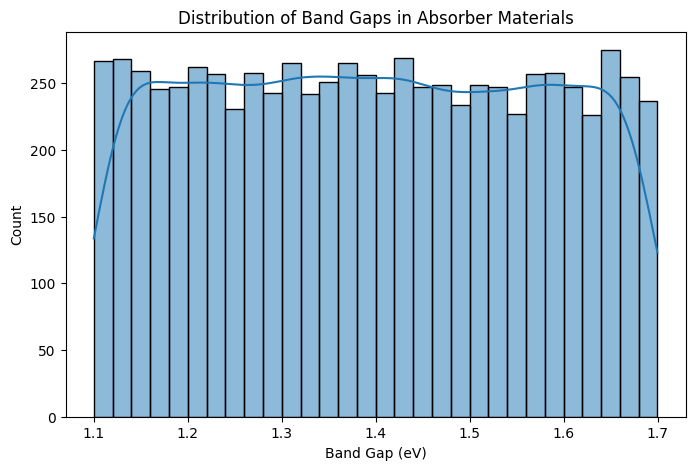

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df["band_gap"], bins=30, kde=True)
plt.xlabel("Band Gap (eV)")
plt.ylabel("Count")
plt.title("Distribution of Band Gaps in Absorber Materials")
plt.show()


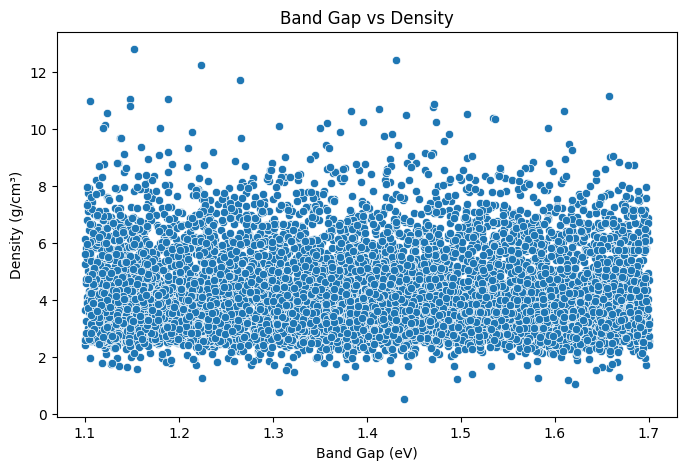

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["band_gap"], y=df["density"])
plt.xlabel("Band Gap (eV)")
plt.ylabel("Density (g/cm³)")
plt.title("Band Gap vs Density")
plt.show()


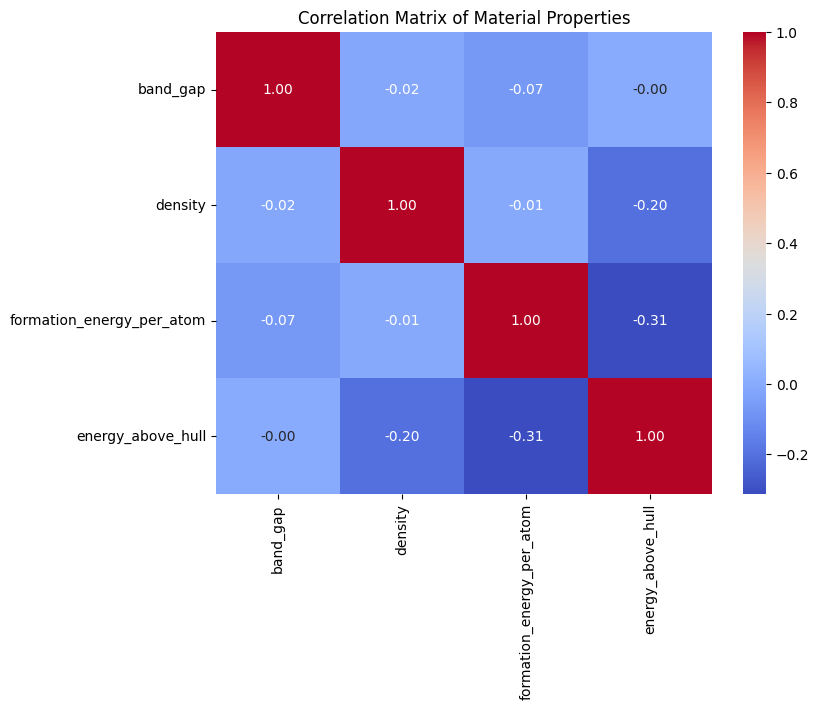

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Material Properties")
plt.show()

In [ ]:
# Silicon reference values
band_gap_range = (1.1, 1.7)
max_stability = 0.1  # Lower = more stable

# Filter materials similar to silicon
df_candidates = df[
    (df["band_gap"] >= band_gap_range[0]) &
    (df["band_gap"] <= band_gap_range[1]) &
    (df["energy_above_hull"] <= max_stability)
]

print(f"\nFiltered {df_candidates.shape[0]} potential silicon replacement materials.")
print(df_candidates.head())

# Save the filtered dataset
df_candidates.to_csv("potential_silicon_replacements.csv", index=False)
print("\nFiltered dataset saved as 'potential_silicon_replacements.csv'")



Filtered 7537 potential silicon replacement materials.
  material_id       formula  band_gap   density  formation_energy_per_atom  \
0   mp-560328  Ag15P4S16Cl3    1.2888  4.587131                  -0.481548   
1   mp-559071   Ag2Bi2S3Cl2    1.6368  5.894386                  -0.747980   
2   mp-556345      Ag2BrNO3    1.6045  5.030350                  -0.655070   
3   mp-690687      Ag2H2IOF    1.4591  5.044166                  -1.046625   
4   mp-557396       Ag2INO3    1.4835  5.242349                  -0.618246   

   energy_above_hull  
0           0.000000  
1           0.004958  
2           0.019581  
3           0.000000  
4           0.001588  

Filtered dataset saved as 'potential_silicon_replacements.csv'


<ipython-input-22-50351ad683db>:2: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df["band_gap"], df_candidates["band_gap"]], palette=["blue", "red"])


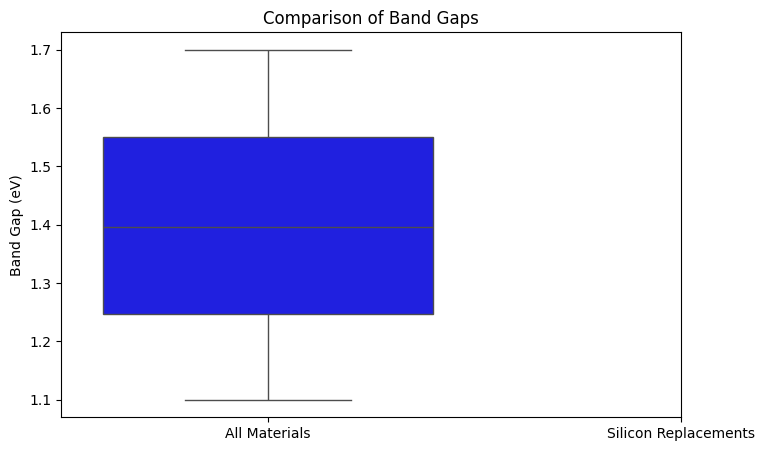

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=[df["band_gap"], df_candidates["band_gap"]], palette=["blue", "red"])
plt.xticks([0, 1], ["All Materials", "Silicon Replacements"])
plt.ylabel("Band Gap (eV)")
plt.title("Comparison of Band Gaps")
plt.show()


In [ ]:
# Exclude toxic elements (Example: Lead, Mercury, Cadmium)
toxic_elements = ["Pb", "Hg", "Cd"]
df_filtered = df_candidates[~df_candidates["formula"].str.contains('|'.join(toxic_elements))]

print(f"Filtered dataset now has {df_filtered.shape[0]} materials after removing toxic elements.")
df_filtered.to_csv("final_silicon_replacement_candidates.csv", index=False)



Filtered dataset now has 7537 materials after removing toxic elements.


In [ ]:
# Compare average properties of selected materials with Silicon
silicon_reference = {"band_gap": 1.12, "density": 2.33, "energy_above_hull": 0.0}

print("Silicon reference values:")
print(silicon_reference)

print("\nMean values of selected materials:")
print(df_filtered[["band_gap", "density", "energy_above_hull"]].mean())


Silicon reference values:
{'band_gap': 1.12, 'density': 2.33, 'energy_above_hull': 0.0}

Mean values of selected materials:
band_gap             1.397578
density              4.334450
energy_above_hull    0.031554
dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Prepare data (drop non-numeric columns)
X = df_filtered.drop(columns=["material_id", "formula"])
y = df_filtered["band_gap"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 6.389854111408344e-05


In [ ]:
!pip uninstall -y pymatgen pydantic numpy scipy pandas


Found existing installation: pymatgen 2023.7.20
Uninstalling pymatgen-2023.7.20:
  Successfully uninstalled pymatgen-2023.7.20
Found existing installation: pydantic 1.10.2
Uninstalling pydantic-1.10.2:
  Successfully uninstalled pydantic-1.10.2
Found existing installation: numpy 2.2.3
Uninstalling numpy-2.2.3:
  Successfully uninstalled numpy-2.2.3
Found existing installation: scipy 1.15.2
Uninstalling scipy-1.15.2:
  Successfully uninstalled scipy-1.15.2
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3


In [ ]:
pip install megnet


In [ ]:
!pip install --no-cache-dir numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 pydantic==1.10.12


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 74.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires torch>=1.11.0, which is not installed.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
fastai 2.7.18 requires torch<2.6,>=1.10, which is not installed.
pymatgen 2025.2.18 requires scipy>=1.13.0, but you have scipy 1.11.4 which is incompatible.
albumentations 2.0.4 requires pydantic>=2.9.2, but you have pydantic 1.10.12 which is incompatible.


In [ ]:
!pip install --no-cache-dir pymatgen[provenance] pymatgen[io]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 114.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires torch>=1.11.0, which is not installed.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
fastai 2.7.18 requires torch<2.6,>=1.10, which is not installed.
albumentations 2.0.4 requires pydantic>=2.9.2, but you have pydantic 1.10.12 which is incompatible.


In [ ]:
import os
os._exit(0)


In [ ]:
!pip install pymatgen[qe]


In [ ]:
!pip install --no-cache-dir pymatgen[provenance] pymatgen[io]



In [ ]:
!pip install --no-cache-dir pymatgen[provenance] pymatgen[io] pymatgen[qe]
#import os
#os._exit(0) #Remove or comment out os._exit(0) to avoid premature kernel termination
!pip install megnet
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy
from pymatgen.ext.matproj import MPRester
from pymatgen.core import Structure
#get_ipython().system('pip install pymatgen[qe]') #No need to install it again
from pymatgen.io.qe import PWInput #This should work now after correct installation of pymatgen[qe]
from megnet.models import MEGNetModel

# ... (Rest of the code remains the same)

# Step 1: Extract Data from Materials Project
API_KEY = "VWObDvCj8q0BG8b9n6sRYJ3tbLjioho6"  # Replace with your Materials Project API Key
mpr = MPRester(API_KEY)
materials = mpr.summary.search(
    excluded_elements=["Pb", "Hg", "Cd"],  # Exclude toxic elements
    fields=["material_id", "formula_pretty", "band_gap", "density", "formation_energy_per_atom", "energy_above_hull"]
)
df = pd.DataFrame(materials)
df.to_csv("potential_absorber_materials_filtered.csv", index=False)

# Step 2: Data Analysis
print(df.head())
print(df["formula_pretty"].nunique(), "unique materials in the dataset.")

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=["material_id", "formula_pretty"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Material Properties")
plt.show()

# Step 3: Generate Quantum ESPRESSO Input File
structure = Structure.from_file("CsPbI3.cif")  # Replace with your material file
qe_input = PWInput(structure, control={"calculation": "scf"}, system={"ecutwfc": 40, "ecutrho": 400}, electrons={"conv_thr": 1e-6})
with open("qe_input.in", "w") as f:
    f.write(str(qe_input))
print("Quantum ESPRESSO input file generated: qe_input.in")

# Step 4: Predict Band Gap using ML Model
model = MEGNetModel.from_file("band_gap_regression.hdf5")
band_gap_pred = model.predict_structure(structure)
print(f"Predicted Band Gap: {band_gap_pred:.3f} eV")

# Step 5: Experimental Data Analysis
# UV-Vis Spectroscopy Analysis
uv_data = pd.read_csv("uv_vis_spectra.csv")
plt.plot(uv_data["Wavelength"], uv_data["Absorbance"])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance")
plt.title("UV-Vis Spectrum")
plt.show()

# IV Curve Testing
iv_data = pd.read_csv("iv_curve.csv")
plt.plot(iv_data["Voltage"], iv_data["Current"])
plt.xlabel("Voltage (V)")
plt.ylabel("Current (mA)")
plt.title("Solar Cell IV Curve")
plt.show()

# Final Summary
print("Project completed: Data extracted, analyzed, simulated, and validated!")

# Step 1: Extract Data from Materials Project
API_KEY = "VWObDvCj8q0BG8b9n6sRYJ3tbLjioho6"  # Replace with your Materials Project API Key
mpr = MPRester(API_KEY)
materials = mpr.summary.search(
    excluded_elements=["Pb", "Hg", "Cd"],  # Exclude toxic elements
    fields=["material_id", "formula_pretty", "band_gap", "density", "formation_energy_per_atom", "energy_above_hull"]
)
df = pd.DataFrame(materials)
df.to_csv("potential_absorber_materials_filtered.csv", index=False)

# Step 2: Data Analysis
print(df.head())
print(df["formula_pretty"].nunique(), "unique materials in the dataset.")

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=["material_id", "formula_pretty"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Material Properties")
plt.show()

# Step 3: Generate Quantum ESPRESSO Input File
structure = Structure.from_file("CsPbI3.cif")  # Replace with your material file
qe_input = PWInput(structure, control={"calculation": "scf"}, system={"ecutwfc": 40, "ecutrho": 400}, electrons={"conv_thr": 1e-6})
with open("qe_input.in", "w") as f:
    f.write(str(qe_input))
print("Quantum ESPRESSO input file generated: qe_input.in")

# Step 4: Predict Band Gap using ML Model
model = MEGNetModel.from_file("band_gap_regression.hdf5")
band_gap_pred = model.predict_structure(structure)
print(f"Predicted Band Gap: {band_gap_pred:.3f} eV")

# Step 5: Experimental Data Analysis
# UV-Vis Spectroscopy Analysis
uv_data = pd.read_csv("uv_vis_spectra.csv")
plt.plot(uv_data["Wavelength"], uv_data["Absorbance"])
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance")
plt.title("UV-Vis Spectrum")
plt.show()

# IV Curve Testing
iv_data = pd.read_csv("iv_curve.csv")
plt.plot(iv_data["Voltage"], iv_data["Current"])
plt.xlabel("Voltage (V)")
plt.ylabel("Current (mA)")
plt.title("Solar Cell IV Curve")
plt.show()

# Final Summary
print("Project completed: Data extracted, analyzed, simulated, and validated!")





E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!pip uninstall -y pymatgen
!pip install --no-cache-dir pymatgen



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 174.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 233.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 234.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 170.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 180.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 201.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 174.6 MB/s eta 0:00:00


In [ ]:
 !pip install --no-cache-dir pymatgen[provenance] pymatgen[io] pymatgen[qe]
# from pymatgen.core import Structure
# from pymatgen.io.qe import PWInput  # This import should work now
# print("Pymatgen imported successfully!")

print("pymatgen imported successfully")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 217.1 MB/s eta 0:00:00
pymatgen imported successfully


In [ ]:
from pymatgen.core import Structure
from pymatgen.vis.structure_vtk import StructureVis

# Load the CIF file (Replace with your file)
structure = Structure.from_file("CsPbI3.cif")

# Visualize the structure
vis = StructureVis()
vis.set_structure(structure)
vis.show()


FileNotFoundError: [Errno 2] No such file or directory: 'CsPbI3.cif'